In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import numpy as np
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

### 1. First, load the dataset.

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

lifeexpectancy_df = pd.read_sql_query('select * from lifeexpectancy',con=engine)

engine.dispose()

### 2. Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [3]:
lifeexpectancy_df.info()
print('Number of Columns:', len(lifeexpectancy_df.columns))
lifeexpectancy_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
lifeexpectancy_df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [5]:
# lower cap column names and striping 
lifeexpectancy_df.columns = lifeexpectancy_df.columns.str.replace(' ', '')
lifeexpectancy_df.columns.str.lower()

Index(['country', 'year', 'status', 'lifeexpectancy', 'adultmortality',
       'infantdeaths', 'alcohol', 'percentageexpenditure', 'hepatitisb',
       'measles', 'bmi', 'under-fivedeaths', 'polio', 'totalexpenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness1-19years',
       'thinness5-9years', 'incomecompositionofresources', 'schooling'],
      dtype='object')

In [6]:
#renaming columns 
lifeexpectancy_df = lifeexpectancy_df.rename(columns={'country':'Country', 'year':'Year', 'status':'Status',
                                                      'infantdeaths':'Infant_Deaths', 'alcohol':'Alcohol',
                                                      'measles':'Measels','bmi':'BMI', 'under-fivedeaths':'Under_five_Deaths',
                                                      'polio':'Polio', 'diphtheria':'Diphtheria', 'hiv/aids':'HIV/AIDS', 
                                                      'gdp':'GDP', 'population':'Population', 'thinness1-19years':'Thinness_1_to_19_Years',
                                                      'Incomecompositionofresources':'Income_Composition_of_Resources', 'schooling':'Schooling',
                                                      'Lifeexpectancy':'Life_Expectancy', 'AdultMortality':'Adult_Mortality',
                                                      'percentageexpenditure':'Percentage_Expenditure', 'HepatitisB':'Hepatitis_B',
                                                      'Totalexpenditure':'Total_Expenditure', 'thinness5-9years':'Thinness_5_to_9_Years'})

In [8]:
#checking for 0 values and null values
print('Number of Columns:', len(lifeexpectancy_df.columns))
print('Number of Total Null values:',lifeexpectancy_df.isna().sum().sum())
print()
print('Column Name: Number of 0 values / number of null values')
print()
for column_name in lifeexpectancy_df:
    print(column_name,':', len(lifeexpectancy_df[lifeexpectancy_df[column_name] == 0]), '/', lifeexpectancy_df[column_name].isna().sum().sum())

Number of Columns: 22
Number of Total Null values: 2563

Column Name: Number of 0 values / number of null values

Country : 0 / 0
Year : 0 / 0
Status : 0 / 0
Life_Expectancy : 0 / 10
Adult_Mortality : 0 / 10
Infant_Deaths : 848 / 0
Alcohol : 0 / 194
Percentage_Expenditure : 611 / 0
Hepatitis_B : 0 / 553
Measles : 983 / 0
BMI : 0 / 34
Under_five_Deaths : 785 / 0
Polio : 0 / 19
Total_Expenditure : 0 / 226
Diphtheria : 0 / 19
HIV/AIDS : 0 / 0
GDP : 0 / 448
Population : 0 / 652
Thinness_1_to_19_Years : 0 / 34
Thinness_5_to_9_Years : 0 / 34
Income_Composition_of_Resources : 130 / 167
Schooling : 28 / 163


In [12]:
#interpolate columns with Null values
lifeexpectancy_df['Life_Expectancy'] = lifeexpectancy_df['Life_Expectancy'].interpolate()
lifeexpectancy_df['Adult_Mortality']= lifeexpectancy_df['Adult_Mortality'].interpolate()
lifeexpectancy_df['Alcohol'] = lifeexpectancy_df['Alcohol'].interpolate()
lifeexpectancy_df['Hepatitis_B'] = lifeexpectancy_df['Hepatitis_B'].interpolate()
lifeexpectancy_df['BMI'] = lifeexpectancy_df['BMI'].interpolate()
lifeexpectancy_df['Polio'] = lifeexpectancy_df['Polio'].interpolate()
lifeexpectancy_df['Total_Expenditure'] = lifeexpectancy_df['Total_Expenditure'].interpolate()
lifeexpectancy_df['Diphtheria'] = lifeexpectancy_df['Diphtheria'].interpolate()
lifeexpectancy_df['GDP'] = lifeexpectancy_df['GDP'].interpolate()
lifeexpectancy_df['Population'] = lifeexpectancy_df['Population'].interpolate()
lifeexpectancy_df['Thinness_1_to_19_Years'] = lifeexpectancy_df['Thinness_1_to_19_Years'].interpolate()
lifeexpectancy_df['Thinness_5_to_9_Years'] = lifeexpectancy_df['Thinness_5_to_9_Years'].interpolate()
lifeexpectancy_df['Income_Composition_of_Resources'] = lifeexpectancy_df['Income_Composition_of_Resources'].interpolate()
lifeexpectancy_df['Schooling'] = lifeexpectancy_df['Schooling'].interpolate()

print('Number of Total Null values:',lifeexpectancy_df.isna().sum().sum())

Number of Total Null values: 0


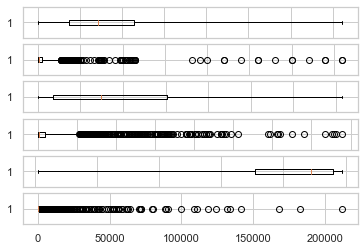

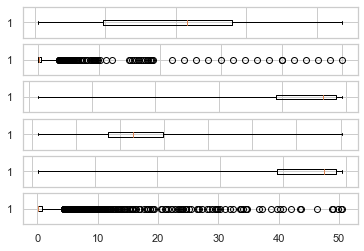

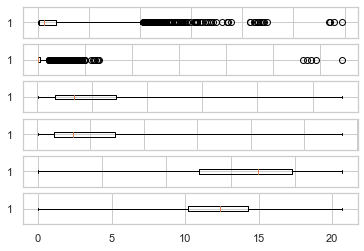

In [19]:
#Graphing columns to check for outliers
fig, ((ax1, ax2, ax3, ax4, ax5, ax6))= plt.subplots(6,1)
ax1.boxplot(lifeexpectancy_df["Adult_Mortality"], whis = 5,vert=False)
ax2.boxplot(lifeexpectancy_df["Infant_Deaths"], whis = 5,vert=False)
ax3.boxplot(lifeexpectancy_df["Alcohol"], whis = 5,vert=False)
ax4.boxplot(lifeexpectancy_df["Percentage_Expenditure"], whis = 5,vert=False)
ax5.boxplot(lifeexpectancy_df["Hepatitis_B"], whis = 5,vert=False)
ax6.boxplot(lifeexpectancy_df["Measles"], whis = 5,vert=False)
for ax in fig.get_axes():
    ax.label_outer()
    
fig, ((bx1, bx2, bx3, bx4, bx5, bx6))= plt.subplots(6,1)
bx1.boxplot(lifeexpectancy_df["BMI"], whis = 5,vert=False)
bx2.boxplot(lifeexpectancy_df["Under_five_Deaths"], whis = 5,vert=False)
bx3.boxplot(lifeexpectancy_df["Polio"], whis = 5,vert=False)
bx4.boxplot(lifeexpectancy_df["Total_Expenditure"], whis = 5,vert=False)
bx5.boxplot(lifeexpectancy_df["Diphtheria"], whis = 5,vert=False)
bx6.boxplot(lifeexpectancy_df["HIV/AIDS"], whis = 5,vert=False)
for ax in fig.get_axes():
    ax.label_outer()
    
fig, (cx1, cx2, cx3, cx4, cx5, cx6)= plt.subplots(6, 1)
cx1.boxplot(lifeexpectancy_df["GDP"], whis = 5,vert=False)
cx2.boxplot(lifeexpectancy_df["Population"], whis = 5,vert=False)
cx3.boxplot(lifeexpectancy_df["Thinness_1_to_19_Years"], whis = 5,vert=False)
cx4.boxplot(lifeexpectancy_df["Thinness_5_to_9_Years"], whis = 5,vert=False)
cx5.boxplot(lifeexpectancy_df["Income_Composition_of_Resources"], whis = 5,vert=False)
cx6.boxplot(lifeexpectancy_df["Schooling"], whis = 5,vert=False)
for ax in fig.get_axes():
    ax.label_outer()

Graphed the columns with outliers. I'll use the Winsorized method to clean the data.

In [20]:
#windsorized columns with outliers
from scipy.stats.mstats import winsorize

lifeexpectancy_df["Infant_Deaths"] = winsorize(lifeexpectancy_df["Infant_Deaths"], (0, 0.1))
lifeexpectancy_df["Percentage_Expenditure"] = winsorize(lifeexpectancy_df["Percentage_Expenditure"], (0, 0.1))
lifeexpectancy_df["Measles"] = winsorize(lifeexpectancy_df["Measles"], (0, 0.15))
lifeexpectancy_df["Under_five_Deaths"] = winsorize(lifeexpectancy_df["Under_five_Deaths"], (0, 0.1))
lifeexpectancy_df["HIV/AIDS"] = winsorize(lifeexpectancy_df["HIV/AIDS"], (0, 0.1))
lifeexpectancy_df["GDP"] = winsorize(lifeexpectancy_df["GDP"], (0, 0.1))
lifeexpectancy_df["Population"] = winsorize(lifeexpectancy_df["Population"], (0, 0.1))

In [42]:
# graphed winsorized columns
fig, ((ax1, ax2, ax3, ax4, ax5, ax6))= plt.subplots(6,1)
ax1.boxplot(lifeexpectancy_df["Adult_Mortality"], whis = 5,vert=False)
ax2.boxplot(lifeexpectancy_df["Infant_Deaths"], whis = 5,vert=False)
ax3.boxplot(lifeexpectancy_df["Alcohol"], whis = 5,vert=False)
ax4.boxplot(lifeexpectancy_df["Percentage_Expenditure"], whis = 5,vert=False)
ax5.boxplot(lifeexpectancy_df["Hepatitis_B"], whis = 5,vert=False)
ax6.boxplot(lifeexpectancy_df["Measles"], whis = 5,vert=False)
for ax in fig.get_axes():
    ax.label_outer()
    
fig, ((bx1, bx2, bx3, bx4, bx5, bx6))= plt.subplots(6,1)
bx1.boxplot(lifeexpectancy_df["BMI"], whis = 5,vert=False)
bx2.boxplot(lifeexpectancy_df["Under_five_Deaths"], whis = 5,vert=False)
bx3.boxplot(lifeexpectancy_df["Polio"], whis = 5,vert=False)
bx4.boxplot(lifeexpectancy_df["Total_Expenditure"], whis = 5,vert=False)
bx5.boxplot(lifeexpectancy_df["Diphtheria"], whis = 5,vert=False)
bx6.boxplot(lifeexpectancy_df["HIV/AIDS"], whis = 5,vert=False)
for ax in fig.get_axes():
    ax.label_outer()
    
fig, (cx1, cx2, cx3, cx4, cx5, cx6)= plt.subplots(6, 1)
cx1.boxplot(lifeexpectancy_df["GDP"], whis = 5,vert=False)
cx2.boxplot(lifeexpectancy_df["Population"], whis = 5,vert=False)
cx3.boxplot(lifeexpectancy_df["Thinness_1_to_19_Years"], whis = 5,vert=False)
cx4.boxplot(lifeexpectancy_df["Thinness_5_to_9_Years"], whis = 5,vert=False)
cx5.boxplot(lifeexpectancy_df["Income_Composition_of_Resources"], whis = 5,vert=False)
cx6.boxplot(lifeexpectancy_df["Schooling"], whis = 5,vert=False)
for ax in fig.get_axes():
    ax.label_outer()

TypeError: 'Figure' object is not callable

### 3. Your goal in this challenge is to find the factors that affect the life expectancy. Specifically, you need to find out which factors increase the expected life in the countries and which factors decrease it.

In [23]:
lifeexpectancy_df[['Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'Under_five_Deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'Thinness_1_to_19_Years',
       'Thinness_5_to_9_Years', 'Income_Composition_of_Resources', 'Schooling']].corr()

,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,BMI,Under_five_Deaths,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1_to_19_Years,Thinness_5_to_9_Years,Income_Composition_of_Resources,Schooling
Life_Expectancy,1.000000,-0.695730,-0.560574,0.400068,0.482369,0.247419,-0.324302,0.556433,-0.588655,0.459865,0.210843,0.474084,-0.763313,0.488341,0.021250,-0.476809,-0.472485,0.690071,0.703409
Adult_Mortality,-0.695730,1.000000,0.361392,-0.194070,-0.311380,-0.162578,0.189709,-0.383224,0.378708,-0.272553,-0.116293,-0.273311,0.599689,-0.316335,-0.016950,0.307734,0.314769,-0.440536,-0.430481
Infant_Deaths,-0.560574,0.361392,1.000000,-0.325668,-0.323234,-0.222556,0.580656,-0.447790,0.993803,-0.346628,-0.148757,-0.331013,0.383160,-0.322070,0.315789,0.451992,0.465014,-0.366754,-0.460089
Alcohol,0.400068,-0.194070,-0.325668,1.000000,0.392668,0.092366,-0.187855,0.319618,-0.321516,0.222830,0.289631,0.218683,-0.137008,0.415659,-0.004712,-0.420123,-0.408260,0.442169,0.507064
Percentage_Expenditure,0.482369,-0.311380,-0.323234,0.392668,1.000000,0.042649,-0.172567,0.309963,-0.319952,0.205264,0.167119,0.192680,-0.239000,0.765250,-0.003994,-0.313623,-0.315116,0.453115,0.470601
Hepatitis_B,0.247419,-0.162578,-0.222556,0.092366,0.042649,1.000000,-0.198912,0.172639,-0.232254,0.446056,0.088999,0.532925,-0.221235,0.081909,-0.006209,-0.141744,-0.150593,0.193478,0.201451
Measles,-0.324302,0.189709,0.580656,-0.187855,-0.172567,-0.198912,1.000000,-0.320488,0.581218,-0.262328,-0.158954,-0.253466,0.200425,-0.174015,0.233744,0.371285,0.373997,-0.187065,-0.274779
BMI,0.556433,-0.383224,-0.447790,0.319618,0.309963,0.172639,-0.320488,1.000000,-0.466468,0.282080,0.233848,0.280483,-0.435648,0.317463,-0.019195,-0.533952,-0.540459,0.461457,0.488210
Under_five_Deaths,-0.588655,0.378708,0.993803,-0.321516,-0.319952,-0.232254,0.581218,-0.466468,1.000000,-0.364335,-0.151356,-0.350797,0.412333,-0.321934,0.296706,0.457085,0.467139,-0.387224,-0.478703
Polio,0.459865,-0.272553,-0.346628,0.222830,0.205264,0.446056,-0.262328,0.282080,-0.364335,1.000000,0.130634,0.675339,-0.353293,0.236685,0.000515,-0.224021,-0.225768,0.360154,0.382657


Positive Correlations with Life Expectancy
    - Alcohol
    - Percentage_Expenditure
    - Hepatitis_B
    - BMI
    - Polio
    - Total_Expenditure
    - Diphtheria
    - GDP
    - Income_Composition_of_Resources
    - Schooling

Negaive Correlations with Life Expectancy
    - Adult_Mortality
    - Infant_Deaths
    - Measels
    - Under-five_Deaths
    - HIV/Aids
    - Population
    - Thinness_1_to_19_Years
    - Thiness_5_to_9_Years

### 3. Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy. 

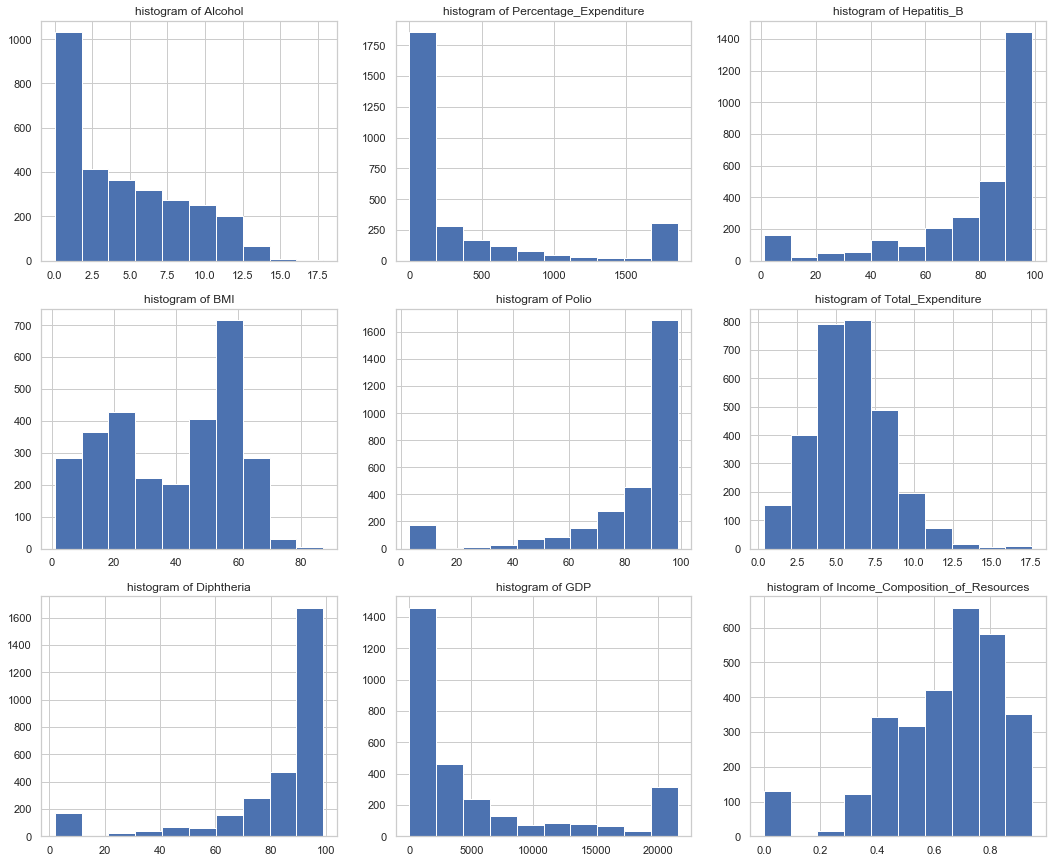

In [24]:
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(lifeexpectancy_df["Alcohol"])
plt.title("histogram of Alcohol")

plt.subplot(3, 3, 2)
plt.hist(lifeexpectancy_df["Percentage_Expenditure"])
plt.title("histogram of Percentage_Expenditure")

plt.subplot(3, 3, 3)
plt.hist(lifeexpectancy_df["Hepatitis_B"])
plt.title("histogram of Hepatitis_B")

plt.subplot(3, 3, 4)
plt.hist(lifeexpectancy_df["BMI"])
plt.title("histogram of BMI")

plt.subplot(3, 3, 5)
plt.hist(lifeexpectancy_df["Polio"])
plt.title("histogram of Polio")

plt.subplot(3, 3, 6)
plt.hist(lifeexpectancy_df["Total_Expenditure"])
plt.title("histogram of Total_Expenditure")

plt.subplot(3, 3, 7)
plt.hist(lifeexpectancy_df["Diphtheria"])
plt.title("histogram of Diphtheria")

plt.subplot(3, 3, 8)
plt.hist(lifeexpectancy_df["GDP"])
plt.title("histogram of GDP")

plt.subplot(3, 3, 9)
plt.hist(lifeexpectancy_df["Income_Composition_of_Resources"])
plt.title("histogram of Income_Composition_of_Resources")



plt.show()

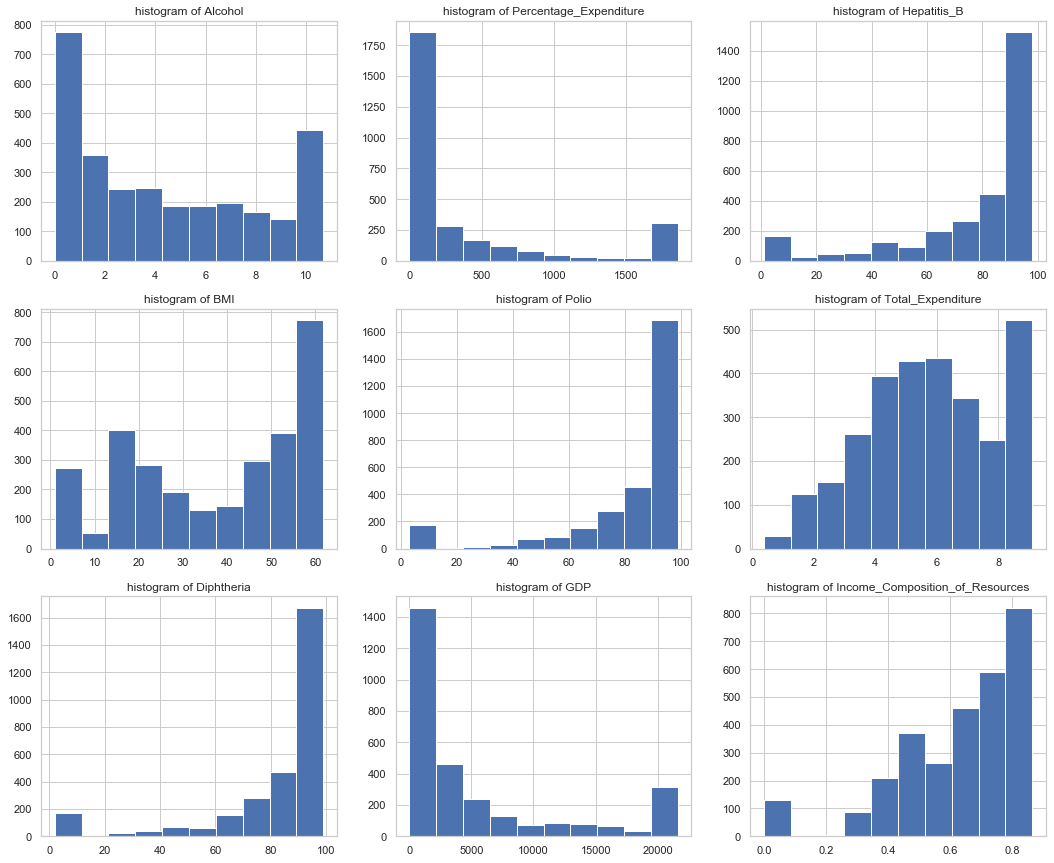

In [28]:
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(winsorize(lifeexpectancy_df["Alcohol"], (0, 0.1)))
plt.title("histogram of Alcohol")

#already winsorized
plt.subplot(3, 3, 2)
plt.hist(lifeexpectancy_df["Percentage_Expenditure"])
plt.title("histogram of Percentage_Expenditure")

plt.subplot(3, 3, 3)
plt.hist(winsorize(lifeexpectancy_df["Hepatitis_B"], (0, 0.10)))
plt.title("histogram of Hepatitis_B")

plt.subplot(3, 3, 4)
plt.hist(winsorize(lifeexpectancy_df["BMI"], (0, 0.10)))
plt.title("histogram of BMI")

plt.subplot(3, 3, 5)
plt.hist(winsorize(lifeexpectancy_df["Polio"], (0, 0.10)))
plt.title("histogram of Polio")

plt.subplot(3, 3, 6)
plt.hist(winsorize(lifeexpectancy_df["Total_Expenditure"], (0, 0.10)))
plt.title("histogram of Total_Expenditure")

plt.subplot(3, 3, 7)
plt.hist(winsorize(lifeexpectancy_df["Diphtheria"], (0, 0.10)))
plt.title("histogram of Diphtheria")

#already winsorized
plt.subplot(3, 3, 8)
plt.hist(lifeexpectancy_df["GDP"])
plt.title("histogram of GDP")

plt.subplot(3, 3, 9)
plt.hist(winsorize(lifeexpectancy_df["Income_Composition_of_Resources"], (0, 0.10)))
plt.title("histogram of Income_Composition_of_Resources")



plt.show()

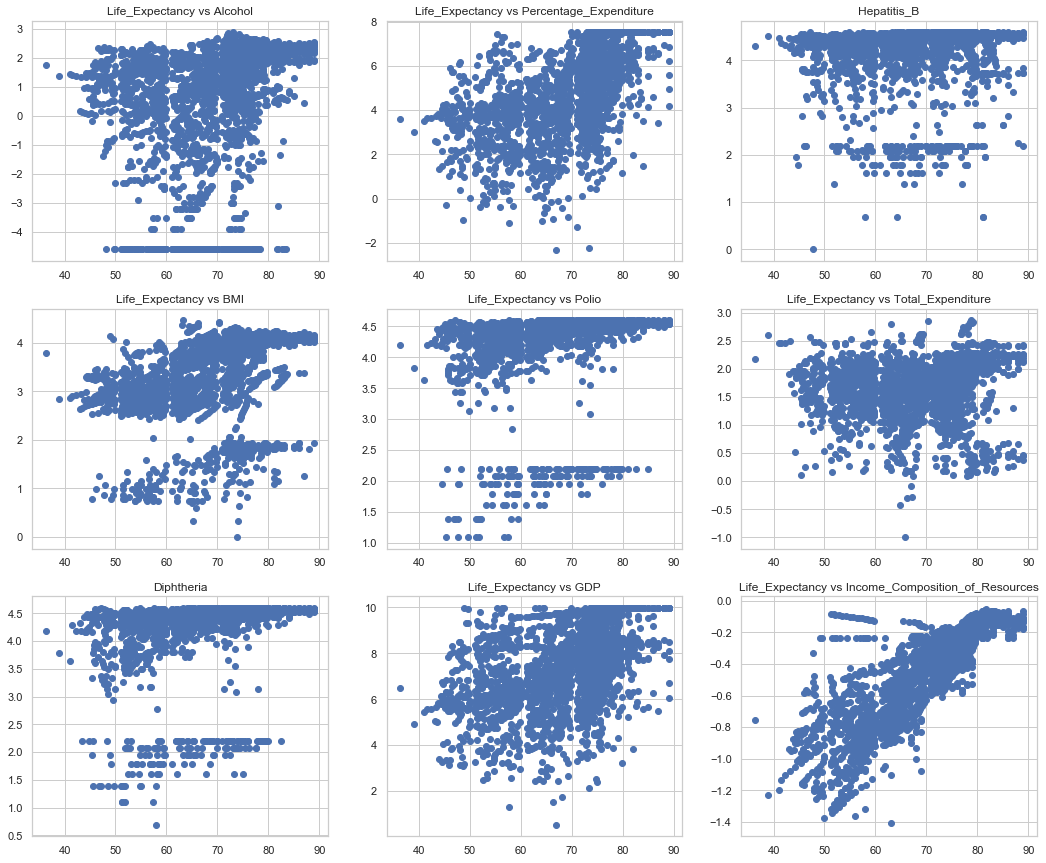

Text(0.5, 1.0, 'Life_Expectancy vs Schooling')

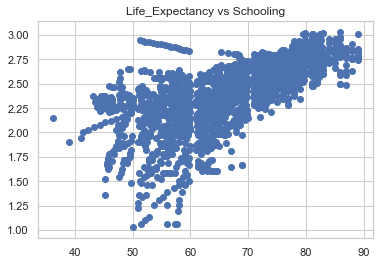

In [48]:
plt.figure(figsize=(18,15))

plt.subplot(3,3,1)
plt.scatter(lifeexpectancy_df["Life_Expectancy"], np.log(lifeexpectancy_df["Alcohol"]))
plt.title("Life_Expectancy vs Alcohol")

plt.subplot(3,3,2)
plt.scatter(lifeexpectancy_df["Life_Expectancy"], np.log(lifeexpectancy_df["Percentage_Expenditure"]))
plt.title("Life_Expectancy vs Percentage_Expenditure")

plt.subplot(3,3,3)
plt.scatter(lifeexpectancy_df["Life_Expectancy"], np.log(lifeexpectancy_df["Hepatitis_B"]))
plt.title("Hepatitis_B")

plt.subplot(3,3,4)
plt.scatter(lifeexpectancy_df["Life_Expectancy"], np.log(lifeexpectancy_df["BMI"]))
plt.title("Life_Expectancy vs BMI")

plt.subplot(3,3,5)
plt.scatter(lifeexpectancy_df["Life_Expectancy"], np.log(lifeexpectancy_df["Polio"]))
plt.title("Life_Expectancy vs Polio")

plt.subplot(3,3,6)
plt.scatter(lifeexpectancy_df["Life_Expectancy"], np.log(lifeexpectancy_df["Total_Expenditure"]))
plt.title("Life_Expectancy vs Total_Expenditure")

plt.subplot(3,3,7)
plt.scatter(lifeexpectancy_df["Life_Expectancy"], np.log(lifeexpectancy_df["Diphtheria"]))
plt.title("Diphtheria")

plt.subplot(3,3,8)
plt.scatter(lifeexpectancy_df["Life_Expectancy"], np.log(lifeexpectancy_df["GDP"]))
plt.title("Life_Expectancy vs GDP")

plt.subplot(3,3,9)
plt.scatter(lifeexpectancy_df["Life_Expectancy"], np.log(lifeexpectancy_df["Income_Composition_of_Resources"]))
plt.title("Life_Expectancy vs Income_Composition_of_Resources")

plt.show()


plt.scatter(lifeexpectancy_df["Life_Expectancy"], np.log(lifeexpectancy_df["Schooling"]))
plt.title("Life_Expectancy vs Schooling")

- Alcohol
- Percentage_Expenditure
- Hepatitis_B
- BMI
- Polio
- Total_Expenditure
- Diphtheria
- GDP
- Income_Composition_of_Resources
- Schooling

### 4. In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

np.log(lifeexpectancy_df["Schooling"])

np.log(lifeexpectancy_df["Percentage_Expenditure"])

np.log(lifeexpectancy_df["GDP"])

### 5. Summarize your findings. One of the most important skills of a data scientist is to convey ideas and findings to nontechnical people using understandable language. In this regard, one of the most effective ways to communicate your ideas is to do it using effective visualization.

The three most correlated features are Income Composition fo Resources, Schooling and GDP with Income Composition of Resources has the most direct correlation with Life Expectancy. 